In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data= pd.read_csv("C:\\Users\\HP\\Desktop\\Jitesh\\yogesh\\Clustering\\university\\Universities.csv")

In [5]:
data.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [6]:
data.shape

(25, 7)

In [20]:
data1=data.iloc[:,1:]

In [22]:
from sklearn.preprocessing import scale
import sklearn as sl
norm_data=scale(data1)

In [27]:
norm1_data =pd.DataFrame(norm_data)
type(norm1_data)

pandas.core.frame.DataFrame

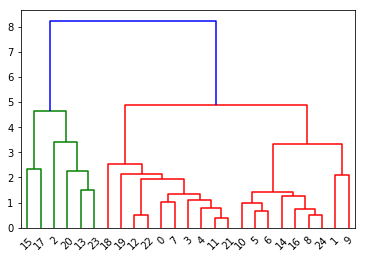

<Figure size 7488x5400 with 0 Axes>

In [37]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch  # dendrogram

z=linkage(norm1_data,method="complete",metric="euclidean")
sch.dendrogram(z)
plt.figure(figsize=(104,75))
plt.show()

In [59]:
# clustering the data on 3
from sklearn.cluster import AgglomerativeClustering

h_complete=AgglomerativeClustering (n_clusters=5,linkage='complete',affinity="euclidean").fit(norm1_data)

In [60]:
h_complete.labels_

array([2, 0, 4, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 3, 0, 1, 0, 1, 2, 2, 3, 2,
       2, 3, 0], dtype=int64)

In [61]:
cluster_no=pd.DataFrame(h_complete.labels_)

In [62]:
data['cluster'] = cluster_no

In [63]:
data.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [64]:
data1=data.iloc[:,[7,0,1,2,3,4,5,6]]

In [65]:
data1.head()

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,Brown,1310,89,22,13,22704,94
1,0,CalTech,1415,100,25,6,63575,81
2,4,CMU,1260,62,59,9,25026,72
3,2,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [67]:
data1.iloc[:,2:].groupby(data['cluster']).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1040.000000,38.500000,78.500000,22.000000,8885.000000,68.000000
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000
3,1115.333333,47.666667,63.666667,16.333333,12504.000000,78.666667
4,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000


In [71]:
data1.to_csv("mar11.csv")